In [175]:
import os
import time
import gzip
import numpy as np
from MulticoreTSNE import MulticoreTSNE as TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

from sklearn.decomposition import PCA
RS = 123

In [2]:
archive_path = "/Users/noods/Code/metabrainz/acousticbrainz/acousticbrainz-server/export/similarity"
data_name = "acousticbrainz-similarity-data-mfccs-timbre-20190901-153206.npy.gz"
class_name = "acousticbrainz-similarity-class-mfccs-timbre-20190901-153206.npy.gz"

data_file = os.path.join(archive_path, data_name)
class_file = os.path.join(archive_path, class_name)
data_f = gzip.GzipFile(data_file, "r")
class_f = gzip.GzipFile(class_file, "r")

data = np.load(data_f)
classes = np.load(class_f)

In [10]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

In [171]:
def scatter(data, classes):
    u_classes = np.unique(classes)
    num_classes = len(u_classes)
    palette = iter(sns.color_palette("hls", num_classes))
    colors = {}
    for cls in u_classes:
        colors[cls] = next(palette)

    get_colors = lambda x: colors[str(x)]
    c = [get_colors(x) for x in list(classes)]

    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(data[:, 0], data[:, 1], lw=0, s=20, c=c)
    ax.axis('off')
    ax.axis('tight')
    
#     legend = ax.legend(*sc.legend_elements(), title="Model Value")
#     ax.add_artist(legend)

In [185]:
data_subset = data[:70000]
classes_subset = classes[:70000]
np.unique(classes_subset)

array(['bright', 'dark'], dtype='<U6')

In [186]:
time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(data_subset)

print("PCA Done! Time elapsed: {} seconds".format(time.time() - time_start))

PCA Done! Time elapsed: 0.16139793395996094 seconds


In [187]:
pca_df = pd.DataFrame(columns = ['pca1', 'pca2', 'pca3', 'pca4'])

pca_df['pca1'] = pca_result[:, 0]
pca_df['pca2'] = pca_result[:, 1]
pca_df['pca3'] = pca_result[:, 2]
pca_df['pca4'] = pca_result[:, 3]

print("Variance explained per principal component: {}".format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.32501898 0.13115495 0.10640444 0.09090937]


In [188]:
top_two_comp = pca_df[['pca1', 'pca2']]

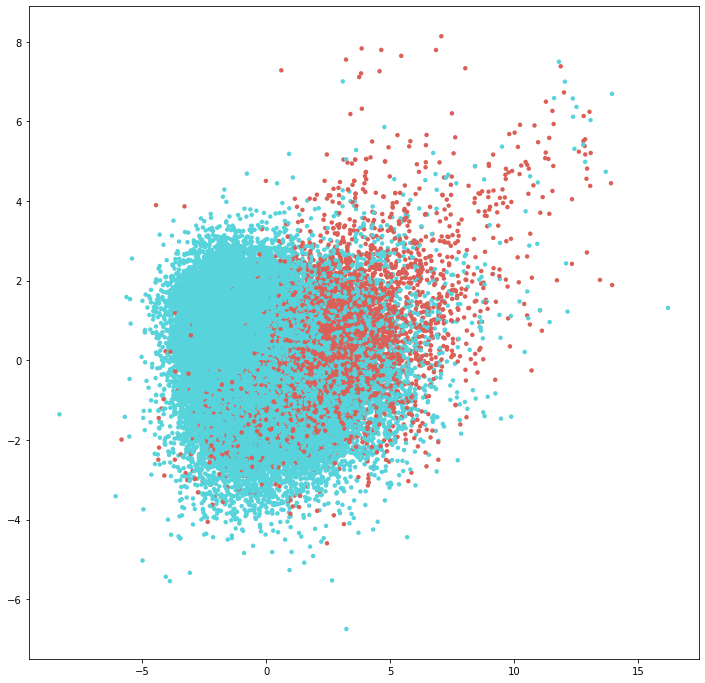

In [189]:
scatter(top_two_comp.values, classes_subset)

In [190]:
time_start = time.time()
tsne = TSNE(n_jobs=5)
tsne_result = tsne.fit_transform(data_subset)
print("TSNE Done! Time elapsed: {} seconds".format(time.time() - time_start))

TSNE Done! Time elapsed: 4989.615672826767 seconds


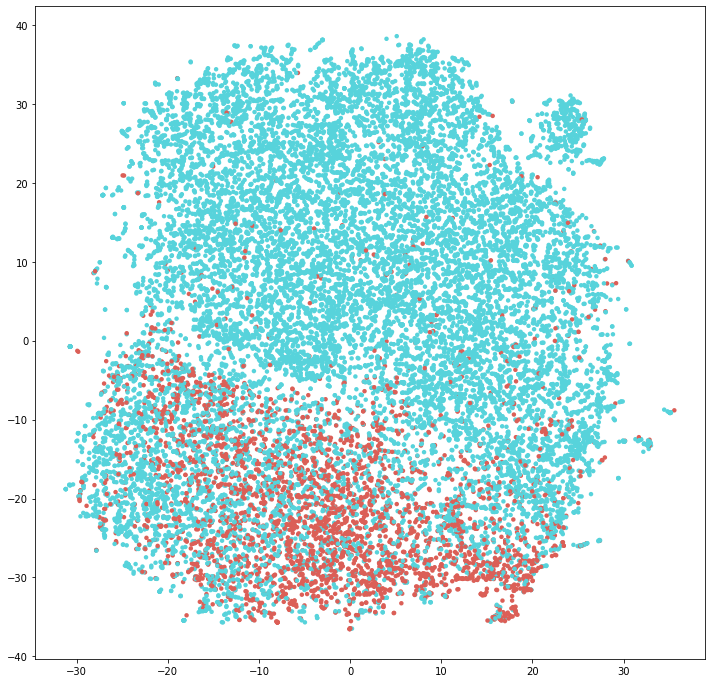

In [184]:
scatter(tsne_result, classes_subset)